<a id="toc"></a>
<p><center style="color:#4cabd3; font-family: 'Dancing Script', cursive; font-size:25px;">Thanks for visiting my notebook </center></p>

<div style="background-color:orange; padding: 5px;">
<div class="alert alert-block alert-secondary" style="font-size:15px; font-family:verdana; text-align:center">  Feel free to work on the notebook to suit your needs.</div></div>

<div>

 <h2 align="left"><font color=orange>About the Session</font></h2>

Please explore my introductory notebook on the same dataset by visiting <a href="https://www.kaggle.com/code/krishd123/plotting-galvanic-skin-response-signals" target="_blank">GSR plots</a>.
    
The session is all about assessing mental workload using Galvanic Skin Response signals'.

<b>Neuro Load</b> refers to  a health concerned research case study for effective diagnosis of mental stress levels using Electrodermal activity or GSR signals.

<div>

 <h2 align="left"><font color=orange>Table of Contents</font></h2></div>
 
<a id="toc"></a>
- [1. Introduction to Study](#1)
- [2. Objectives of Study](#2)
- [3. Starting Operations](#3)
- [4. Continuous Wavelet Transform](#4)
- [5. Feature Extraction](#5)

<a id="1"></a>
## <b><span style='color:orange'>INTRODUCTION</span></b> 

- **Mental workload** has become a critical aspect of human performance assessment in various domains such as aviation, healthcare, and industrial operations.
- It can significantly impact:

  a) Cognitive Performance
  
  b) Decision-making
  
  c) Safety and Efficiency
- This project aims to introduce an innovative method for assessing mental workload using **Galvanic Skin Response (GSR) signals**.
- Why GSR?

  a) Non-Invasive Measurement Technique
  
  b) Real-time Monitoring Capability
  
  c) Sensitivity to Emotional and Cognitive States

<a id="toc"></a>

<a href="#toc" style="background-color: orange; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="2"></a>
## <b><span style='color:orange'>OBJECTIVES</span></b> 

- Fetch the data of galvanic skin response 
- Extract/obtain necessary features from it.
- Using the feature set, build a suitable classifier to classify the mental workload. 
- Obtain all classification performance parameters.

<a id="toc"></a>

<a href="#toc" style="background-color: orange; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="3"></a>
## <b><span style='color:orange'>Foundation / Basics</span></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the CSV file
df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv')
display(df)    # 2nd person's low mwl data

,Trial 1:0back,Trial 6:0back
0,4.038,6.964
1,4.040,6.967
2,4.041,6.969
3,4.042,6.971
4,4.043,6.972
...,...,...
76795,2.205,4.158
76796,2.206,4.157
76797,2.205,4.157
76798,2.205,4.157


Sample Input Signal

Text(0.5, 0, 'Time(sec)')

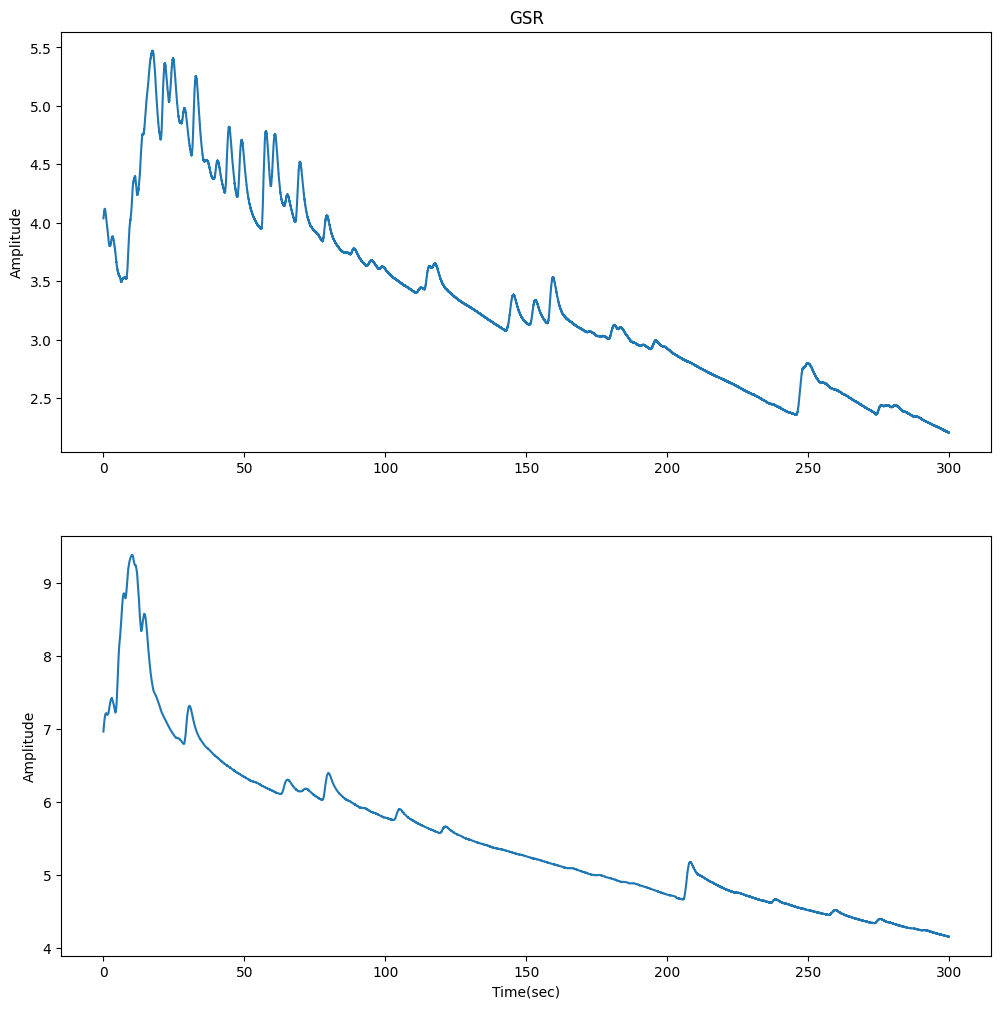

In [2]:
# Extract the required gsr values
gsr_1=df['Trial 1:0back']
gsr_2=df['Trial 6:0back']

# Set the sampling rate of gsr data 256 Hz
sampling_rate=256

# Create a time array based on the sampling rate and length of the gsr values
time=np.arange(len(gsr_1))/sampling_rate

# Plot the gsr values against time
fig, axes = plt.subplots(2, figsize=(12, 12))

# The top panel shows the input signal
ax = axes[0]
ax.plot(time, gsr_1)
ax.set_ylabel("Amplitude")
ax.set_title("GSR")

ax=axes[1]
ax.plot(time,gsr_2)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(sec)")


**Consider set 1 as first 768 rows of the data**

In [3]:
set1=df.iloc[0:768]
set1

,Trial 1:0back,Trial 6:0back
0,4.038,6.964
1,4.040,6.967
2,4.041,6.969
3,4.042,6.971
4,4.043,6.972
...,...,...
763,3.873,7.416
764,3.874,7.417
765,3.874,7.417
766,3.875,7.417


**Applying Preprocessing as Standard scaling**

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(set1)    # gives an array of preprocessed values
X    

array([[ 0.79311317, -2.49231871],
       [ 0.81024059, -2.46482543],
       [ 0.8188043 , -2.44649657],
       ...,
       [-0.61133507,  1.65916719],
       [-0.60277136,  1.65916719],
       [-0.60277136,  1.65000276]])

In [5]:
X.shape  # checking shape of the array

(768, 2)

In [6]:
xdf=pd.DataFrame(X)    # converting array into dataframe
xdf[0]   # Scaled values of column 1

0      0.793113
1      0.810241
2      0.818804
3      0.827368
4      0.835932
         ...   
763   -0.619899
764   -0.611335
765   -0.611335
766   -0.602771
767   -0.602771
Name: 0, Length: 768, dtype: float64

In [7]:
sampling_rate=256   # as defined previously (no change)
signal = xdf[0].values  # array of preprocessed signal values
t=np.arange(len(signal))/sampling_rate

Text(0.5, 1.0, 'Preprocessed GSR')

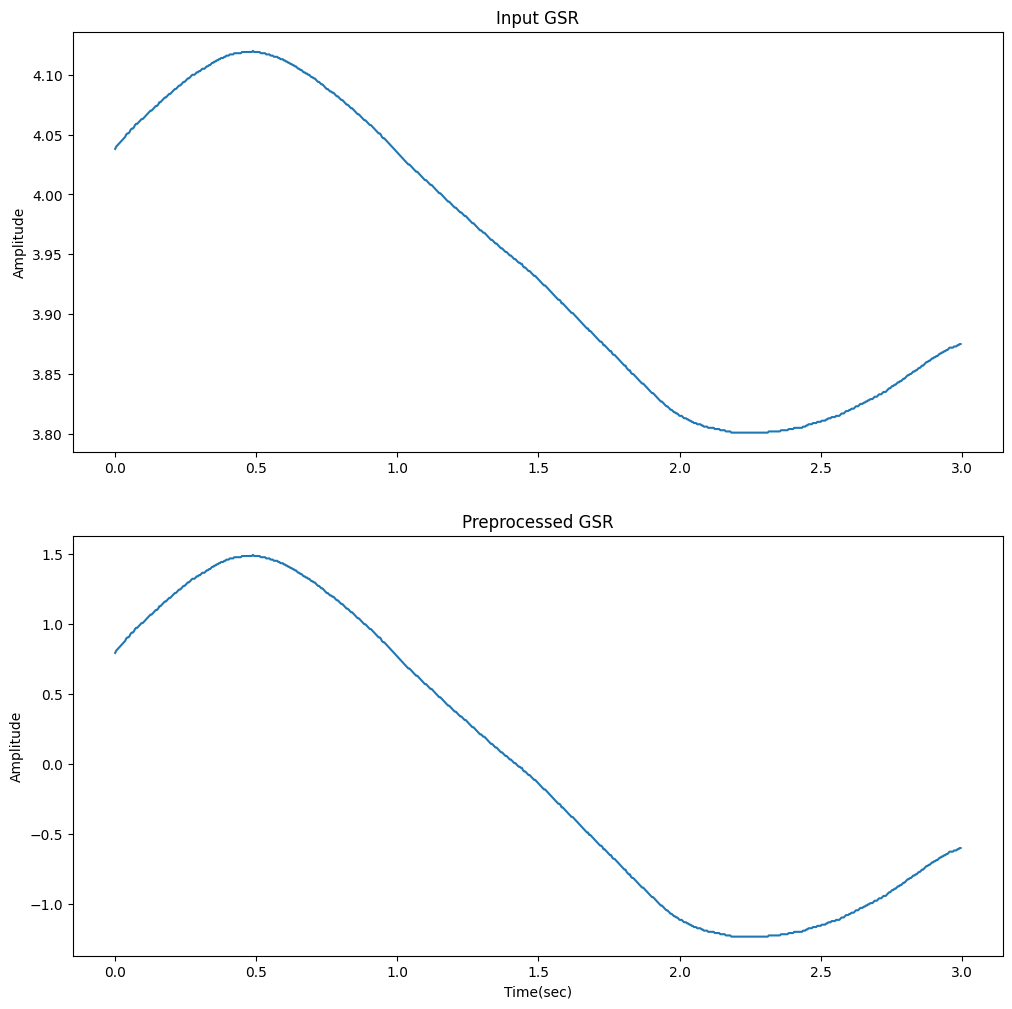

In [8]:
s=set1[['Trial 1:0back']].values
# Plotting the gsr values against time
fig, axes = plt.subplots(2, figsize=(12, 12))

# The input signal v/s preprocessed signal
ax = axes[0]
ax.plot(t,s)
ax.set_ylabel("Amplitude")
ax.set_title("Input GSR")

ax=axes[1]
ax.plot(t,signal)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time(sec)")
ax.set_title("Preprocessed GSR")

<a id="toc"></a>

<a href="#toc" style="background-color: orange; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="4"></a>
## <b><span style='color:orange'>Inroduction to Continuous Wavelet Transform (CWT)</span></b>


The **Continuous Wavelet Transform** (CWT) is a mathematical tool used to **analyze both time and frequency characteristics of signals simultaneously**.

- It involves scaling and translating a wavelet function across the signal to capture different frequency components at various time scales. 

- The result is a time-frequency representation known as a **scalogram**, useful for tasks like **signal denoising**, **feature extraction**, and **pattern recognition**. 

- CWT is advantageous for its continuous analysis capability but can be **computationally intensive** compared to the Discrete Wavelet Transform (DWT).

In [9]:
# Importing Pywavelet module
import pywt

**Applying CWT on preprocessed GSR signal**

In [10]:
wavlist=pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

Normally used (supported) wavelets:
- Mexican Hat (mexh), 
- Morlet (morl),
- Complex Morlet (cmorB-C),
- Gaussian Derivative (gausP),
- Complex Gaussian Derivative (cgauP)
- Shannon (shanB-C),
- Frequency B-Spline (fbspB-C)

In [11]:
l=len(signal)
wavelet = 'morl'  # Morlet wavelet is commonly used

# Calculate Nyquist frequency(nf)
nyquist_freq = sampling_rate / 2
# Although min scale is taken as 1/nf 
# but here its too small therefore we define:
mins=1   # minimum scale
maxs=270  # maximum scale
scales = np.arange(mins,maxs+1)
 
'''
CWT using Python wavelet module (pywt)
- signal: Input Signal (array)
- scales: Scales to be used for CWT (array)
- wavelet: Name of Wavelet used (string)
- Other Parameters:
  - method: {'conv', 'fft'} (optional)
  - sampling_period: Seconds for output freqs (float) (optional)
  - axis: A number (int) (optional)
'''
coef, freqs = pywt.cwt (signal,scales,wavelet)
# coef: CWT coefficients (array)
# freqs: Frequencies corresponding to scales (array)

In [12]:
coef.shape

(270, 768)

In [13]:
freqs.shape

(270,)

**Visualizing CWT**

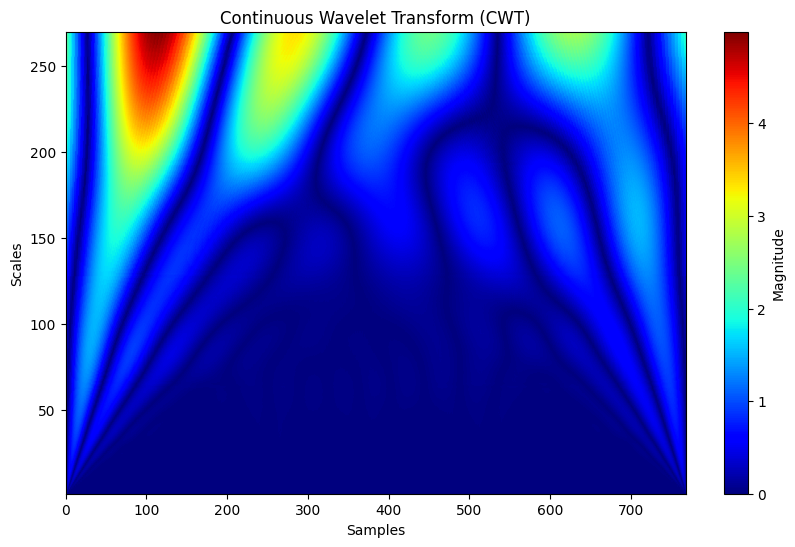

Text(0, 0.5, 'Magnitude')

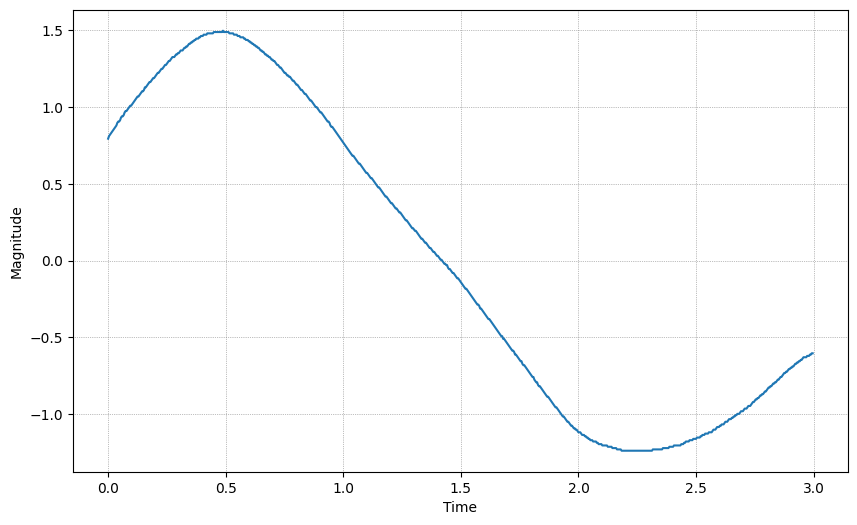

In [14]:
# Plotting Scalogram
plt.figure(figsize=(10,6));
plt.imshow(np.abs(coef), extent=[0,l,maxs,mins], cmap='jet', aspect='auto')
plt.gca().invert_yaxis()
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT)')
plt.xlabel('Samples')
plt.ylabel('Scales')
plt.show()

# Plotting Signal
plt.figure(figsize=(10,6));
plt.plot(t, signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Magnitude')

**Repeating the same process from start, for sample of High workload data so as to check if there is any difference in plots or not**

,Trial 3:3back,Trial 5:3back
0,6.786,6.524
1,6.785,6.523
2,6.785,6.524
3,6.785,6.524
4,6.785,6.523
...,...,...
76795,6.718,6.307
76796,6.717,6.307
76797,6.717,6.307
76798,6.717,6.307


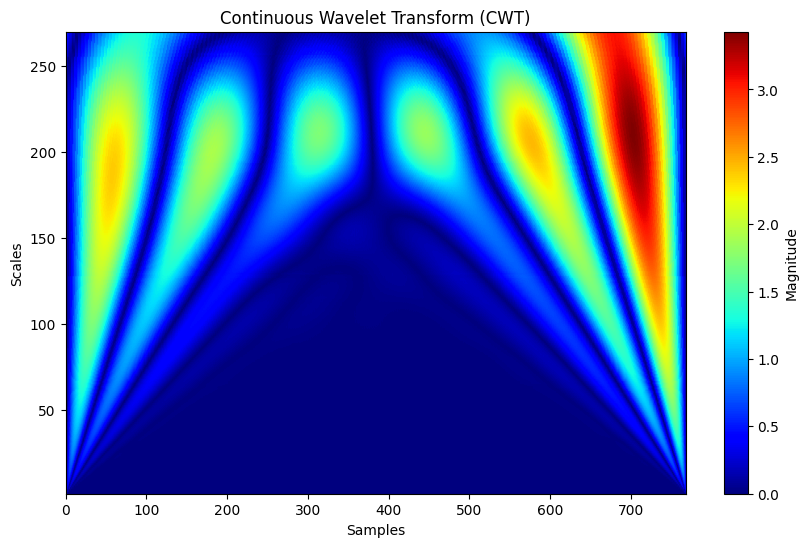

Text(0, 0.5, 'Magnitude')

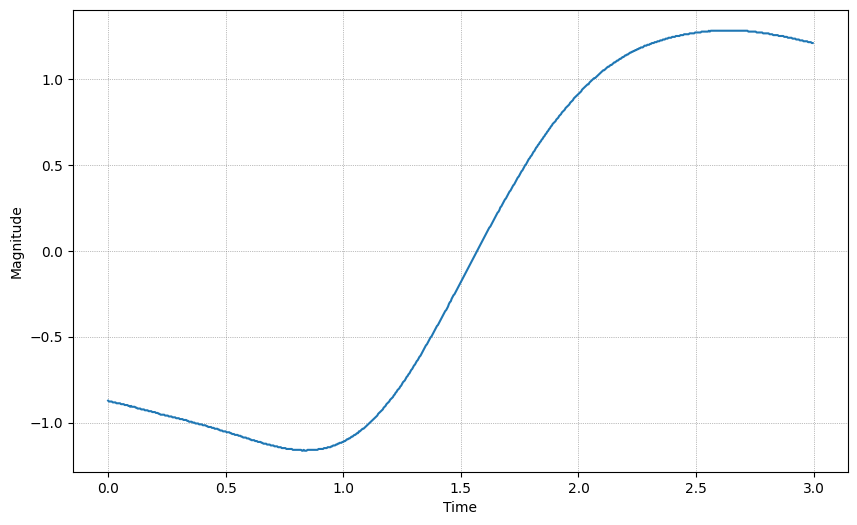

In [15]:
df1=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p2h.csv')
display(df1)         # 2nd person's high mwl data
set2=df1.iloc[0:768]   # extracting first 768 rows
set2

sc_Y = StandardScaler()
Y = sc_Y.fit_transform(set2)
ydf=pd.DataFrame(Y)    

signal2 = ydf[0].values # array of preprocessed signal values of column 1
coef2, freqs2 = pywt.cwt (signal2,scales,'morl')

plt.figure(figsize=(10,6));
plt.imshow(np.abs(coef2), extent=[0,l,maxs,mins], cmap='jet', aspect='auto')
plt.gca().invert_yaxis()
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT)')
plt.xlabel('Samples')
plt.ylabel('Scales')
plt.show()

# Plotting Signal
plt.figure(figsize=(10,6));
plt.plot(t, signal2)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Magnitude')

**Observation** - Using Interpolation, xticks, yticks and variable scales to see if visualization could be done better

In [16]:
'''
signal = xdf[0].values # array of preprocessed signal values of column 1
l=len(signal)
# Perform Continuous Wavelet Transform (CWT)
wavelet = 'morl'  # Morlet wavelet is commonly used

# Calculate Nyquist frequency
nyquist_freq = sampling_rate / 2  # Hz
mins=1   # minimum scale
maxs=1200  # maximum scale
scales = np.arange(mins, maxs+1)
coef, freqs = pywt.cwt (signal,scales,wavelet)

plt.figure(figsize=(12,6));
plt.imshow(np.abs(coef), extent=[0,l,maxs,mins], interpolation='bilinear', cmap='jet', aspect='auto')
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,maxs+1,100))
plt.xticks(np.arange(0,l+1,64))
plt.title('Continuous Wavelet Transform (CWT)')
plt.xlabel('Samples')
plt.ylabel('Scale')
plt.show()

# Plotting scalogram along with signal
plt.figure(figsize=(12, 6));
plt.plot(t, signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Signal Values')
'''

"\nsignal = xdf[0].values # array of preprocessed signal values of column 1\nl=len(signal)\n# Perform Continuous Wavelet Transform (CWT)\nwavelet = 'morl'  # Morlet wavelet is commonly used\n\n# Calculate Nyquist frequency\nnyquist_freq = sampling_rate / 2  # Hz\nmins=1   # minimum scale\nmaxs=1200  # maximum scale\nscales = np.arange(mins, maxs+1)\ncoef, freqs = pywt.cwt (signal,scales,wavelet)\n\nplt.figure(figsize=(12,6));\nplt.imshow(np.abs(coef), extent=[0,l,maxs,mins], interpolation='bilinear', cmap='jet', aspect='auto')\nplt.gca().invert_yaxis()\nplt.yticks(np.arange(1,maxs+1,100))\nplt.xticks(np.arange(0,l+1,64))\nplt.title('Continuous Wavelet Transform (CWT)')\nplt.xlabel('Samples')\nplt.ylabel('Scale')\nplt.show()\n\n# Plotting scalogram along with signal\nplt.figure(figsize=(12, 6));\nplt.plot(t, signal)\nplt.grid(color='gray', linestyle=':', linewidth=0.5)\nplt.xlabel('Time')\nplt.ylabel('Signal Values')\n"

In [17]:
'''
signal2 = ydf[0].values # array of preprocessed signal values of column 1
l=len(signal2)
# Perform Continuous Wavelet Transform (CWT)
wavelet = 'morl'  # Morlet wavelet is commonly used

# Calculate Nyquist frequency
nyquist_freq = sampling_rate / 2  # Hz
mins=1   # minimum scale
maxs=1200  # maximum scale
scales = np.arange(mins, maxs+1)
coef2, freqs2 = pywt.cwt (signal2,scales,wavelet)

plt.figure(figsize=(12,6));
plt.imshow(np.abs(coef2), extent=[0,l,maxs,mins], interpolation='bilinear', cmap='jet', aspect='auto')
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,maxs+1,100))
plt.xticks(np.arange(0,l+1,64))
plt.title('Continuous Wavelet Transform (CWT)')
plt.xlabel('Samples')
plt.ylabel('Scale')
plt.show()

# Plotting scalogram along with signal
plt.figure(figsize=(12, 6));
plt.plot(t, signal2)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Signal Values')
'''

"\nsignal2 = ydf[0].values # array of preprocessed signal values of column 1\nl=len(signal2)\n# Perform Continuous Wavelet Transform (CWT)\nwavelet = 'morl'  # Morlet wavelet is commonly used\n\n# Calculate Nyquist frequency\nnyquist_freq = sampling_rate / 2  # Hz\nmins=1   # minimum scale\nmaxs=1200  # maximum scale\nscales = np.arange(mins, maxs+1)\ncoef2, freqs2 = pywt.cwt (signal2,scales,wavelet)\n\nplt.figure(figsize=(12,6));\nplt.imshow(np.abs(coef2), extent=[0,l,maxs,mins], interpolation='bilinear', cmap='jet', aspect='auto')\nplt.gca().invert_yaxis()\nplt.yticks(np.arange(1,maxs+1,100))\nplt.xticks(np.arange(0,l+1,64))\nplt.title('Continuous Wavelet Transform (CWT)')\nplt.xlabel('Samples')\nplt.ylabel('Scale')\nplt.show()\n\n# Plotting scalogram along with signal\nplt.figure(figsize=(12, 6));\nplt.plot(t, signal2)\nplt.grid(color='gray', linestyle=':', linewidth=0.5)\nplt.xlabel('Time')\nplt.ylabel('Signal Values')\n"

<a id="toc"></a>

<a href="#toc" style="background-color: orange; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="5"></a>
## <b><span style='color:orange'>Feature Extaction using CWT</span></b>

**Merging CSV files**

In [18]:
# merging twenty two csv files of Low workload
bdata = pd.concat(
    map(pd.read_csv, ['/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p3l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p4l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p5l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p6l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p8l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p10l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p11l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p12l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p13l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p14l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p15l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p16l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p17l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p18l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p19l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p20l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p21l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p22l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p23l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p24l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p25l.csv']), ignore_index=True)

# merging twenty two csv files of High workload
cdata = pd.concat(
    map(pd.read_csv, ['/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p2h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p3h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p4h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p5h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p6h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p8h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p11h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p12h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p13h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p14h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p15h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p16h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p17h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p18h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p19h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p20h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p21h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p22h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p23h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p24h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p25h.csv']), ignore_index=True)

# Saving combo dataframes as csv files for later application
gsr_high_data = cdata.to_csv('GSR_high.csv', index = True)
gsr_low_data = bdata.to_csv('GSR_low.csv', index = True)

In [19]:
# Low workload data
display(bdata)

,Trial 1:0back,Trial 6:0back
0,4.038,6.964
1,4.040,6.967
2,4.041,6.969
3,4.042,6.971
4,4.043,6.972
...,...,...
1689595,0.220,0.485
1689596,0.220,0.485
1689597,0.220,0.485
1689598,0.220,0.485


In [20]:
# High workload data
display(cdata)

,Trial 3:3back,Trial 5:3back
0,6.786,6.524
1,6.785,6.523
2,6.785,6.524
3,6.785,6.524
4,6.785,6.523
...,...,...
1689595,0.431,0.451
1689596,0.433,0.450
1689597,0.432,0.450
1689598,0.432,0.450


Working on LOW data

In [21]:
# Pre-processing
sc_X = StandardScaler()
X = sc_X.fit_transform(bdata)

low=pd.DataFrame(X)
low['Label']=0
display(low)

,0,1,Label
0,0.729059,1.530305,0
1,0.729808,1.531406,0
2,0.730183,1.532139,0
3,0.730558,1.532873,0
4,0.730933,1.533240,0
...,...,...,...
1689595,-0.702171,-0.846970,0
1689596,-0.702171,-0.846970,0
1689597,-0.702171,-0.846970,0
1689598,-0.702171,-0.846970,0


Capturing featured scalograms for low data in a directory as follows

In [22]:
# Looping/Windowing
import os
from tqdm import tqdm  # For progress bar

setnos, labels, paths = [], [], []
count = 1

print("Capturing starts")
for k in range(0, 2):  # Outer loop
    t=5*k+1
    print(f"\n\n\nTrial {t}")
    for j in tqdm(range(1, 2201)):  # Inner loop with tqdm for progress bar
        i = 0
        while i < 768 * j:
            data_slice = low.iloc[i:i + 768, k]
            i += 768

        signal = data_slice.values
        coef, _ = pywt.cwt(signal, scales, 'morl')
        W = np.abs(coef)

        # Create directory if not exists
        directory = f'./scalogram_low_WL'
        os.makedirs(directory, exist_ok=True)

        # Save scalogram as NumPy array
        file_path = os.path.join(directory, f'image_{count}.npy')
        np.save(file_path, W)

        # Update metadata
        setnos.append(count)
        labels.append(0)
        paths.append(file_path)
        count += 1

print("Capturing ends")


Capturing starts



Trial 1


100%|██████████| 2200/2200 [08:21<00:00,  4.39it/s]





Trial 6


100%|██████████| 2200/2200 [08:22<00:00,  4.38it/s]

Capturing ends


In [23]:
df_scalogram_low=pd.DataFrame(zip(paths,labels,setnos),columns=['Image_path','Label','Set_no'])
df_scalogram_low

,Image_path,Label,Set_no
0,./scalogram_low_WL/image_1.npy,0,1
1,./scalogram_low_WL/image_2.npy,0,2
2,./scalogram_low_WL/image_3.npy,0,3
3,./scalogram_low_WL/image_4.npy,0,4
4,./scalogram_low_WL/image_5.npy,0,5
...,...,...,...
4395,./scalogram_low_WL/image_4396.npy,0,4396
4396,./scalogram_low_WL/image_4397.npy,0,4397
4397,./scalogram_low_WL/image_4398.npy,0,4398
4398,./scalogram_low_WL/image_4399.npy,0,4399


Working on HIGH data

In [24]:
# Pre-processing the data
from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(cdata)

high=pd.DataFrame(Y)
high['Label']=1
display(high)

,0,1,Label
0,1.294932,1.227664,1
1,1.294599,1.227306,1
2,1.294599,1.227664,1
3,1.294599,1.227664,1
4,1.294599,1.227306,1
...,...,...,...
1689595,-0.822600,-0.941763,1
1689596,-0.821934,-0.942120,1
1689597,-0.822267,-0.942120,1
1689598,-0.822267,-0.942120,1


Capturing featured scalograms for high data in a directory as follows

In [25]:
# Looping
setnos2, labels2, paths2 = [], [], []
count = 4401

print("Capturing starts")
for k in range(0, 2):  # Outer loop
    t=2*k+3
    print(f"\n\n\nTrial {t}")
    for j in tqdm(range(1, 2201)):  # Inner loop with tqdm for progress bar
        i = 0
        while i < 768 * j:
            data_slice = high.iloc[i:i + 768, k]
            i += 768

        signal = data_slice.values
        coef, _ = pywt.cwt(signal, scales, 'morl')
        W = np.abs(coef)

        # Create directory if not exists
        directory = f'./scalogram_high_WL'
        os.makedirs(directory, exist_ok=True)

        # Save scalogram as NumPy array
        file_path = os.path.join(directory, f'image_{count}.npy')
        np.save(file_path, W)

        # Update metadata
        setnos2.append(count)
        labels2.append(1)
        paths2.append(file_path)
        count += 1

print("Capturing ends")

Capturing starts



Trial 3


100%|██████████| 2200/2200 [08:21<00:00,  4.39it/s]





Trial 5


100%|██████████| 2200/2200 [08:26<00:00,  4.34it/s]

Capturing ends


In [26]:
df_scalogram_high=pd.DataFrame(zip(paths2,labels2,setnos2),columns=['Image_path','Label','Set_no'])
df_scalogram_high

,Image_path,Label,Set_no
0,./scalogram_high_WL/image_4401.npy,1,4401
1,./scalogram_high_WL/image_4402.npy,1,4402
2,./scalogram_high_WL/image_4403.npy,1,4403
3,./scalogram_high_WL/image_4404.npy,1,4404
4,./scalogram_high_WL/image_4405.npy,1,4405
...,...,...,...
4395,./scalogram_high_WL/image_8796.npy,1,8796
4396,./scalogram_high_WL/image_8797.npy,1,8797
4397,./scalogram_high_WL/image_8798.npy,1,8798
4398,./scalogram_high_WL/image_8799.npy,1,8799


**Final Data**

In [27]:
sc_low_data = df_scalogram_low.to_csv('Sc_low.csv', index = True)
sc_high_data = df_scalogram_high.to_csv('Sc_high.csv', index = True)
# merging two csv files of whole featured data
data = pd.concat(
    map(pd.read_csv, ['/kaggle/working/Sc_low.csv','/kaggle/working/Sc_high.csv']), ignore_index=True)

In [28]:
data=data.drop(['Unnamed: 0'], axis=1)
data

,Image_path,Label,Set_no
0,./scalogram_low_WL/image_1.npy,0,1
1,./scalogram_low_WL/image_2.npy,0,2
2,./scalogram_low_WL/image_3.npy,0,3
3,./scalogram_low_WL/image_4.npy,0,4
4,./scalogram_low_WL/image_5.npy,0,5
...,...,...,...
8795,./scalogram_high_WL/image_8796.npy,1,8796
8796,./scalogram_high_WL/image_8797.npy,1,8797
8797,./scalogram_high_WL/image_8798.npy,1,8798
8798,./scalogram_high_WL/image_8799.npy,1,8799


<a id="toc"></a>

<a href="#toc" style="background-color: orange; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="6"></a>
## <b><span style='color:orange'>Scalograms Conversion (.npy to .jpg)</span></b>

In [29]:
from PIL import Image
import os
import numpy as np

# Ensure the output directory exists
outpath = "/kaggle/working/Sc_Low"
os.makedirs(outpath, exist_ok=True)

i = 1
while i < 4401:
    # Load the numpy array from the correct path
    img_array = np.load(f'/kaggle/working/scalogram_low_WL/image_{i}.npy')

    # Normalize the array to [0, 255] and convert to uint8
    img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255
    img_array = img_array.astype(np.uint8)

    # Convert the numpy array to an image with mode='L' (grayscale) or mode='RGB' (color)
    img = Image.fromarray(img_array, mode='L')  # Change mode to 'RGB' if the array is RGB format

    # Save the image as JPEG
    img.save(os.path.join(outpath, f"img_{i}.jpg"))

    i += 1

In [30]:
# Ensure the output directory exists
outpath2 = "/kaggle/working/Sc_High"
os.makedirs(outpath2, exist_ok=True)

i = 4401
while i < 8801:
    # Load the numpy array from the correct path
    img_array = np.load(f'/kaggle/working/scalogram_high_WL/image_{i}.npy')

    # Normalize the array to [0, 255] and convert to uint8
    img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255
    img_array = img_array.astype(np.uint8)

    # Convert the numpy array to an image with mode='L' (grayscale) or mode='RGB' (color)
    img = Image.fromarray(img_array, mode='L')  # Change mode to 'RGB' if the array is RGB format

    # Save the image as JPEG
    img.save(os.path.join(outpath2, f"img_{i}.jpg"))

    i += 1